# Falling Coffee Filter

The discussion on this notebook follows the text closely. Refer to pages 59 (bottom) through 63.

The following data track a coffee filter that was released to fall under the influence of gravity. The large surface area of the coffee filter makes air resistance an important consideration. You will soon learn there are complexities in real data acquired with experimental and measurement errors. To begin, note the time value does not start at zero. Also note that you can assume the $\Delta t$ is about 0.0247 and not variable (even though it does vary).

`
//Falling coffee filter
//Time ( s )	Position ( m )
0.2055	0.4188
0.2302	0.4164
0.255	0.4128
0.2797	0.4082
0.3045	0.4026
0.3292	0.3958
0.3539	0.3878
0.3786	0.3802
0.4033	0.3708
0.428	0.3609
0.4526	0.3505
0.4773	0.34
0.502	0.3297
0.5266	0.3181
0.5513	0.3051
0.5759	0.2913
0.6005	0.2788
0.6252	0.2667
0.6498	0.2497
0.6744	0.2337
0.699	0.2175
0.7236	0.2008
0.7482	0.1846
0.7728	0.1696
0.7974	0.1566
0.822	0.1393
0.8466	0.1263
`

### Problem 1

Cut and paste the data into a file. Read the file and plot the positions as a function of time.

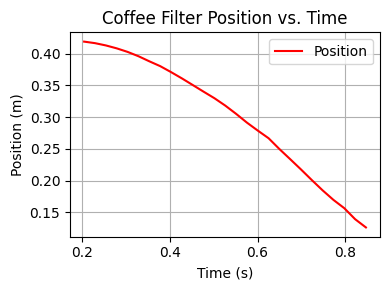

In [306]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.loadtxt('data/coffeefilter.txt')

time = data[:, 0]
position = data[:, 1]

plt.figure(figsize=(4, 3))
plt.plot(time, position, 'r-', label='Position')
plt.ylabel('Position (m)')
plt.xlabel('Time (s)')
plt.title('Coffee Filter Position vs. Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Computing derivatives

As you are seeing in class, derivatives of quantities are critical to our understanding of the world. With position data, we can find velocity and acceleration from derivatives. A good balance between accuracy and simplicity is achieved with central finite differencing schemes. The formulas are as follows

$$v(t) = \frac{y(t + \Delta t) - y(t - \Delta t)}{2\Delta t}$$

and for acceleration

$$a(t) = \frac{y(t + \Delta t) - 2y(t) + y(t - \Delta t)}{\Delta t^2}.$$

### Problem 2
Determine the first and second derivatives of position: velocity, and acceleration respectively. Plot them. Give careful thought to what the values on the time axis should be. Make clear distinctions between the points the derivatives are computed at and the lines connecting them. Label axes. Estimate, by inspection, the terminal velocity of the coffee filter. Comment on any unusual features you see in the data. Finally, plot $a$ vs $v$ and see if that provides addition insight into the terminal velocity.


In [307]:
def v(position, time):
    dt = time[1] - time[0]

    velocity = (position[2:] - position[:-2]) / (2 * dt)
    return velocity

def a(position, time) :
    dt = time[1] - time[0]

    acceleration = (position[2:] - 2 * position[1:-1] + position[:-2]) / (dt**2)
    return acceleration

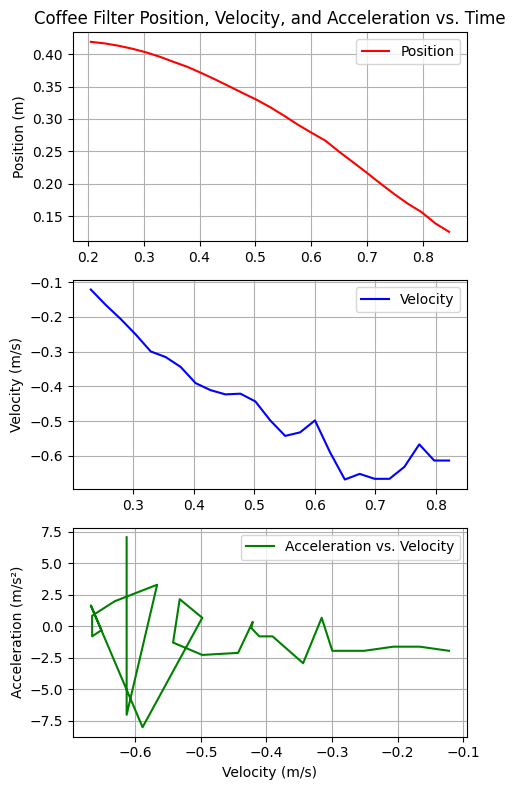

In [308]:
velocity = v(position, time)
acceleration = a(position, time)

plt.figure(figsize=(5, 8))

plt.subplot(3, 1, 1)
plt.plot(time, position, 'r-', label='Position')
plt.ylabel('Position (m)')
plt.title('Coffee Filter Position, Velocity, and Acceleration vs. Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(time[1:-1], velocity, 'b-', label='Velocity')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(velocity, acceleration, 'g-', label='Acceleration vs. Velocity')
plt.ylabel('Acceleration (m/s²)')
plt.xlabel('Velocity (m/s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Friction on a falling body

The role of friction on a falling body can generally be modeled with the simple modification of Newton's Second Law. Assume there is another force, friction, that opposes motion. Now there are two forces, gravity pulling the object down, and friction, pushing the object back up. We call the frictional forces *drag*. It can be modeled as

$$F_d = C_1v$$

or

$$F_d = C_2v^2$$

depending on the speed and diameter of the objects.

These are *phenomenological laws* - they have been found to work through experimentation, but their range of validity is small.

Eventually, terminal velocity is reached. This is the point where the drag resistance is equal to gravity and the object's speed no longer changes.

$$ mg = C_1 v_t \rightarrow C_1 = \frac{mg}{v_t}$$

and for quadratic drag

$$ mg = C_2 v_t^2 \rightarrow C_2= \frac{mg}{v_t^2}$$

While just minor algebra, these expression relate the constants in terms of things you can measure - the terminal velocity

$$F_d = \frac{mg}{v_t}v$$

and

$$F_d = mg \left(\frac{v}{v_t}\right)^2.$$

We're close to completion. Finally, write the complete balance of forces for a falling body with friction

$$F = -mg\left(1 - \frac{v}{v_t}\right)$$

and

$$F = -mg\left(1 - \left(\frac{v}{v_t}\right)^2\right)$$

#### Problem 3
Chose the appropriate numerical algorithm from last week to integrate the system of ODEs resulting from both linear and quadratic drag forces. Experiment with the values of $v_t$ to try and get the best possible fit to the data. Comment on which of the two drag relations appears to work better.

In [309]:
def Euler(dt, f, t, y, args):
    return y + f(t,y,*args) * dt

def EulerCromer(dt, f, t, y, args):
    y_end = y + f(t, y, *args) * dt
    return y + f(t + dt, y_end, *args) * dt

def EulerRichardson(dt, f, t, y, args):
    k1 = f(t, y, *args)
    y_mid = y + k1 * (dt/2)
    k2 = f(t + dt/2, y_mid, *args)
    return y + k2 * dt

def solve_ode(f,tspan, y0, method = Euler, *args, **options):
    t0, tf = tspan
    dt = options.get('first_step', 0.01)

    t = [t0]
    y = [y0]

    while t[-1] < tf:
        y_c = y[-1]
        t_c = t[-1]

        y_new = method(dt, f, t_c, y_c, args)
        t_new = t_c + dt

        y.append(y_new)
        t.append(t_new)

    return np.array(t), np.array(y)

def fb_linear_drag(t, y, g, v_t):
    return np.array([y[1], g * (1 - (y[1]/v_t))])

def fb_quadratic_drag(t, y, g, v_t):
    return np.array([y[1], g * (1 - (y[1]/v_t)**2)])


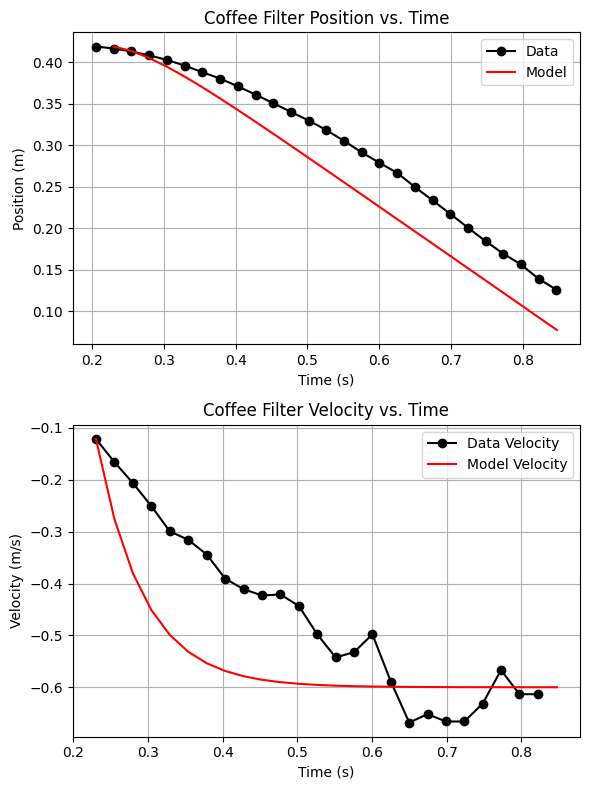

In [310]:
g = -9.8
v_t = -0.6
dt = 0.0247

y0 = np.array([position[0], velocity[0]])
tspan = (time[1], time[-1])
t, y = solve_ode(fb_linear_drag, tspan, y0, EulerRichardson, g, v_t, first_step=dt)
p = y[:, 0]
vel_model = y[:, 1]

plt.figure(figsize=(6, 8))

plt.subplot(2, 1, 1)
plt.plot(time, position, color='black', linestyle='-', marker='o', label='Data')
plt.plot(t, p, 'r-', label='Model')
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Coffee Filter Position vs. Time")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time[1:-1], velocity, color='black', linestyle='-', marker='o', label='Data Velocity')
plt.plot(t, vel_model, 'r-', label='Model Velocity')
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Coffee Filter Velocity vs. Time")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

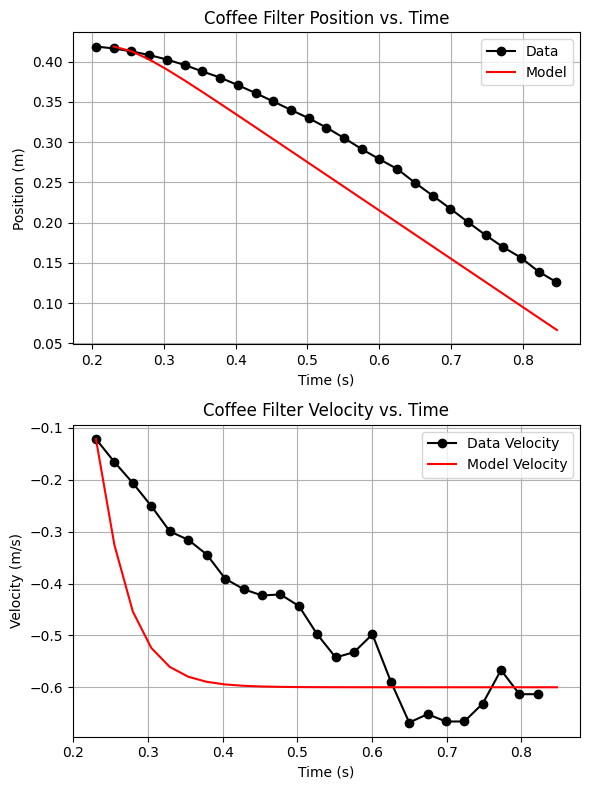

In [311]:
t, y = solve_ode(fb_quadratic_drag, tspan, y0, EulerRichardson, g, v_t, first_step=0.0247)
p = y[:, 0]
vel_model = y[:, 1]

plt.figure(figsize=(6, 8))

plt.subplot(2, 1, 1)
plt.plot(time, position, color='black', linestyle='-', marker='o', label='Data')
plt.plot(t, p, 'r-', label='Model')
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Coffee Filter Position vs. Time")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time[1:-1], velocity, color='black', linestyle='-', marker='o', label='Data Velocity')
plt.plot(t, vel_model, 'r-', label='Model Velocity')
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Coffee Filter Velocity vs. Time")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Generalization of drag force

While 'low' and 'high' speeds are not well characterized, and it's not easy to decide which applies to the coffee filter, it is possible to generalize what we don't know and systematically explore it.

Let us suppose the coffee filter is in the process of transitioning from a linear to a quadratic drag force. Write the balance of forces on the falling body as:

$$F = -mg\left( 1 - \left( \frac{v}{v_t}\right)^{\alpha} \right)$$

#### Problem 4
Code up this generalized drag force and plot the results of the ODE solver on the same axes as the position data. Through visual inspection, come up with the best fit you can.


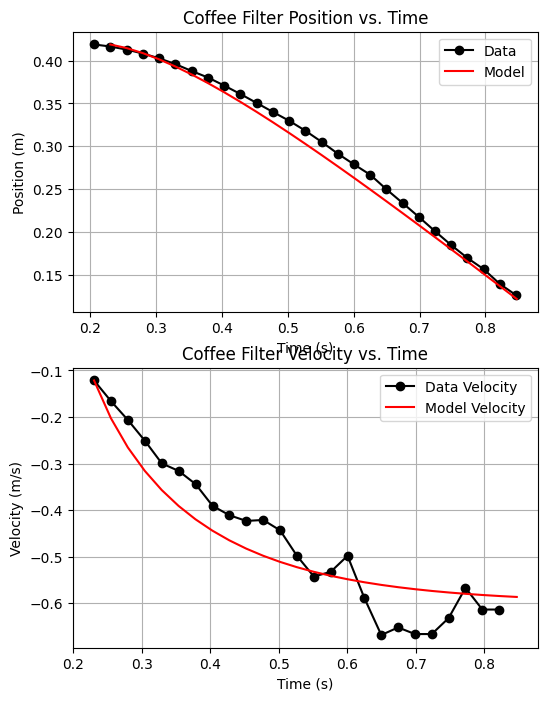

In [312]:
def fb_general_drag(t, y, g, v_t, alpha):
    return np.array([y[1], g * (1 - (y[1]/v_t)**alpha)])

alpha = 0.325

t, y = solve_ode(fb_general_drag, tspan, y0, EulerRichardson, g, v_t, alpha,  first_step=0.0247)
p = y[:, 0]
vel_model = y[:, 1]

plt.figure(figsize=(6, 8))

plt.subplot(2, 1, 1)
plt.plot(time, position, color='black', linestyle='-', marker='o', label='Data')
plt.plot(t, p, 'r-', label='Model')
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Coffee Filter Position vs. Time")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time[1:-1], velocity, color='black', linestyle='-', marker='o', label='Data Velocity')
plt.plot(t, vel_model, 'r-', label='Model Velocity')
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Coffee Filter Velocity vs. Time")
plt.legend()
plt.grid(True)